<a href="https://colab.research.google.com/github/kabirchhabra/Skillslash/blob/main/Deep_Learning/5_CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras.models import Model

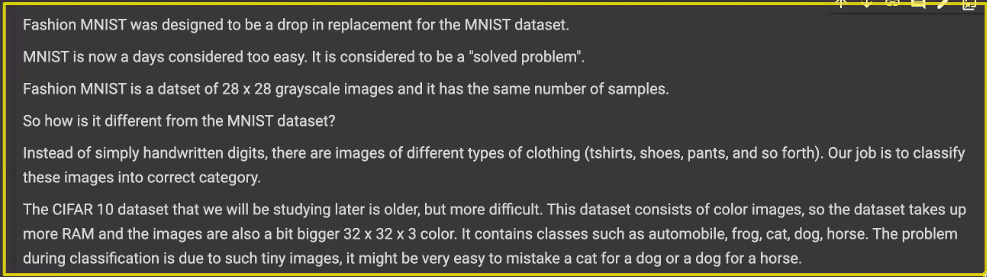

In [2]:
#Load in the data
fashion_mnist = tf.keras.datasets.fashion_mnist

(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train, x_test = [x_train / 255.0, x_test/255.0]  #scaling of data

4431872/4422102 [==============================] - 0s 0us/step


In [3]:
x_train.shape

(60000, 28, 28)

+ load_data returns two tupes, 1st being train set and 2nd being the test set.
+ Each tuple is split up into two arrays, 
> 1. the input images stored as a numpy arrays and
> 2. the labels also stores as a numpy arrays.

Note-1: x_train.shape gives Nx28x28 grayscale, pixel values 0 to 255. But, this is not the right shape for CNN. CNN expects NxHxWxC. So in order to make a color channel, we have to add a forth dimension to the X matrix of size 1, which simply means No data is being added. Essentially a superflous dimension is added. Yhere the new shape will now become Nx28x28x1.

Note-2: Luckily, CIFAR 10 daya is Nx32x32x3, pixel values 0 to 255. So there is no inconvenience here as in Fashion MNIST. However, here the output labels are Nx1. But this is a very trivial issue. Simply using flatten helps.

In [4]:
x_train = np.expand_dims(x_train, -1)
x_test = np.expand_dims(x_test,-1)

In [5]:
set(y_train)

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [6]:
K = len(set(y_train))
print('no. of classes: ', K)

no. of classes:  10


In [7]:
x_train.shape

(60000, 28, 28, 1)

In [8]:
x_train[0].shape

(28, 28, 1)

In [9]:
#Build the model using the Functional API
i = Input(shape=x_train[0].shape)
x = Conv2D(32, (3,3), strides=2, activation='relu')(i)
x = Conv2D(64, (3,3), strides=2, activation='relu')(i)
x = Conv2D(128, (3,3), strides=2, activation='relu')(i)
x = Flatten()(x)
x = Dropout(0.2)(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.2)(x)
x = Dense(K, activation='softmax')(x)

#Once we have a variable representing the input 'i' and the variable representing the output 'x',
#We can pass these into the model constructor

model = Model(i,x)

In [10]:
#Compile and fit
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

r = model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs=15)

Epoch 1/15
1875/1875 [==============================] - 22s 5ms/step - loss: 0.3946 - accuracy: 0.8564 - val_loss: 0.3224 - val_accuracy: 0.8809
Epoch 2/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2677 - accuracy: 0.9017 - val_loss: 0.2817 - val_accuracy: 0.8978
Epoch 3/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.2161 - accuracy: 0.9183 - val_loss: 0.2771 - val_accuracy: 0.9028
Epoch 4/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1761 - accuracy: 0.9333 - val_loss: 0.2713 - val_accuracy: 0.9064
Epoch 5/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1429 - accuracy: 0.9471 - val_loss: 0.3059 - val_accuracy: 0.9062
Epoch 6/15
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1188 - accuracy: 0.9562 - val_loss: 0.3273 - val_accuracy: 0.9065
Epoch 7/15
1875/1875 [==============================] - 10s 5ms/step - loss: 0.0972 - accuracy: 0.9640 - val_loss: 0.3214 - val_accurac

**Observation:** We are getting a decent accuracy. But, its definitely not as high as the classic MNIST. The fashion MNIST dataset is more difficult.

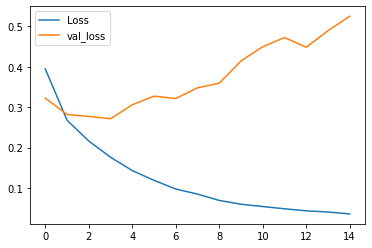

In [11]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='Loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

**Observation:**: It appeas that the model is overfitting a little bit since we see that the validation loss is going sligthly up.

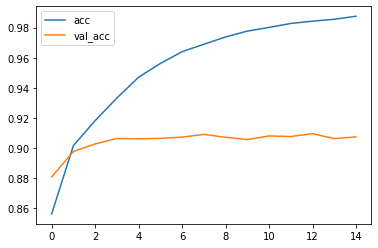

In [12]:
plt.plot(r.history['accuracy'], label='acc')
plt.plot(r.history['val_accuracy'], label='val_acc')
plt.legend()

**Observation:** 
Here, it appears that the validation accuracy stays pretty steady. This is interesting to see when the validation loss simultaneously goes up. It means that the model is becoming more and more confident in its incorrect predictions. 

Confusion matrix, without normalization
[[859   1  16  20   2   1  92   0   9   0]
 [  2 980   1  11   3   0   1   0   2   0]
 [ 21   1 850   8  48   0  72   0   0   0]
 [ 14   3  14 906  28   0  29   0   6   0]
 [  1   1  63  23 836   0  74   0   2   0]
 [  0   0   0   0   0 977   0   9   1  13]
 [114   1  39  20  50   1 762   0  13   0]
 [  0   0   0   0   0   9   0 960   1  30]
 [  4   0   1   4   0   2   7   3 979   0]
 [  0   1   0   0   0   4   0  28   1 966]]


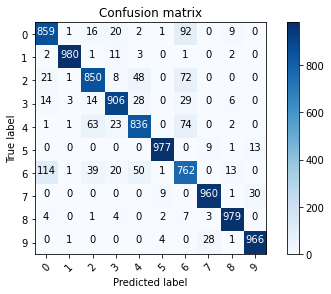

In [13]:
# Plot confusion matrix
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
  """
  This function prints and plots the confusion matrix.
  Normalization can be applied by setting `normalize=True`.
  """
  if normalize:
      cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
      print("Normalized confusion matrix")
  else:
      print('Confusion matrix, without normalization')

  print(cm)

  plt.imshow(cm, interpolation='nearest', cmap=cmap)
  plt.title(title)
  plt.colorbar()
  tick_marks = np.arange(len(classes))
  plt.xticks(tick_marks, classes, rotation=45)
  plt.yticks(tick_marks, classes)

  fmt = '.2f' if normalize else 'd'
  thresh = cm.max() / 2.
  for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, format(cm[i, j], fmt),
               horizontalalignment="center",
               color="white" if cm[i, j] > thresh else "black")

  plt.tight_layout()
  plt.ylabel('True label')
  plt.xlabel('Predicted label')
  plt.show()


p_test = model.predict(x_test).argmax(axis=1)
cm = confusion_matrix(y_test, p_test)
plot_confusion_matrix(cm, list(range(10)))



**Observation:** 
Lets check the two most wrong predictions.

a. True Label = 0, Predicted Label = 6, Value = 135

b. True Label = 6, Predicted Label = 4, Value = 124

Lets check what those are below.

We observe that Prediction 'a' confuses "T-shirt/top" with "Shirt". And that makes sense too, because they are both shirts.

We also observe that Prediction 'a' confuses "Shirt" with "Coat". And that makes sense too, because they have the same shape, they are the clothes meant for covering our upper body.

In [14]:
# Label mapping
labels = '''T-shirt/top
Trouser
Pullover
Dress
Coat
Sandal
Shirt
Sneaker
Bag
Ankle boot'''.split("\n")

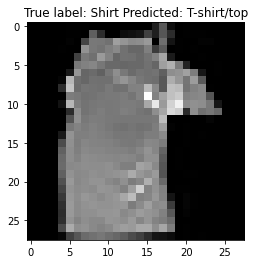

In [17]:
# Show some misclassified examples
misclassified_idx = np.where(p_test != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i].reshape(28,28), cmap='gray')
plt.title("True label: %s Predicted: %s" % (labels[y_test[i]], labels[p_test[i]]));

**END**